# Data Mining course
## Project 1
## Eyal Greenberg & Lindsay Vitovsky, January 2017

## -------------------------------------------------------------------------------------------------------

## I. Business understanding

For this project, our team analyzed a data set obtained from the UCI Machine Learning Repository, titled "Census Income Data Set".  This data set is a subset of the "1994 US Census Database", which we are deducing was pulled from 1990 census data given that 1990 was the latest year in whcih data was collected before this data subset was collected.  The download page for the subset touts 48,842 instances with fourteen attributes, however, when downloaded, the data set actually contained 32,561.  We continued with the data set since it still met the "medium-sized data set" requirement of at least 30,000.

Of course, census data is not as reliable as one would like for reasons expanded on in the "Data Unstanding" section of this paper.  We, nonetheless, chose this data set because it still hold some interesting implications.  At the time of this paper, the income disparity between the wealthiest US households and the rest of the population is becoming an increasingly contentious subject.  Could one uncover statistically significant results that showed certain socioeconomic groups belong to one income group or another (>=\$50K or <$50K)?  Could these results discover  systematic reasons for this disparity?  Does education only result in higher incomes if it points someone to a certain profession?

Census data might reveal more about what it does not reveal than what it does.  Many critical articles of the census we reviewed (included in our References) are based on the claim that the data might favor certain groups over others due to non-sampling.  While we are interested to see what we find out about the data, we acknowledge that we cannot infer more than what the integrity of the US Census allows.  

Overall, we are using this data set to:

*Introduce ourselves to Python 3 for Exploratory Data Analysis, becoming more familiar with the popular processes, tools, and APIs commonly used by the data science community.
    
*Distinguish, from the visualizations we are able to produce, which ones represent the various implications with the most clarity and meaning.
    
*Uncover meaningful inferences from the Census Income Dataset, including the additional questions we will undoubtedly be faced with.

In [1]:
# TBU


## II. Data Understanding

### A. Description of the data

According to the data set [landing page](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_links "UCI Machine Learning Census Income Data Set"), this data set was originally collected by Ronny Kohavi and Barry Becker of Silicon Graphics to predict whether a person "makes over 50K a year."  It is descbribed as a "reasonably clean data set", and was chosen from the larger census based on the following parameters: 
    
* **Age > 16**

* **Adjusted Gross Income (AGI) > \$100.**  This is to only include those earning at least $100.

* **Final Weight (fnlwgt) > 1.**  Kohavi and Becker used a series of controls to create a subset that resembled the weights of socioecononic status of the original data set.  "fnlwgt" is a weighted tally that describes the number of people that the observation represents, according to the Population Division at the Census Bureau. 

* **Hours Per Week (HRSWK) > 0.** This is to only include those who state that they work more than 0 hours per week.

#### Variables
Within the subset, the following variables were included:

* **age**: a continuous scale of an observation's age

* **workclass**: categorical(8); Private, Self-emp-not-inc (Self-employed, not incorporated), Self-emp-inc (Self-employed and incorporated), Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

* **fnlwgt**: continuous scale (refer to description in preceding paragraph)

* **education**: categorical (16); Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

* **education-num**: continuous scale of the # of education years completed

* **marital-status**: categorical (7); Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

* **occupation**: categorical (14), representing the occupation of the instance / observation; Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

* **relationship**: categorical (6), representing the relationship of the instance to the household; Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

* **race**: categorical (5); White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

* **sex**: categorical (2); Female, Male

* **capital-gain**: continuous; defines how much, if any, an instance had a capital gain (i.e. money leftover) after paying taxes.

* **capital-loss**: continuous; defines how much, if any, an instance lost (i.e. was "in the hole") after paying taxes.

* **hours-per-week**: continous; the average number of hours one works each week

* **native-country**: categorical; references one's country of birth.  Countries included in the subset are the United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

The US Census is a reflection of the US population at a particular moment in time given the collection techniques (<cite>"Behind Inaccuracies in the Census", The Leadership Conference</cite>).  Even if the data were highly reliable, one would want to review multiple censuses over time to view trends.  The US Census faces challenges such as:

* *Seasonality* - Does the season of the year (Spring 1994) matter? Seasonal workers might not have been available, school is in session, and even the weather may have played a role in various geographic areas that may have made it problematic to gather data.
    
* *Access* - Even access to mail can be problematic for some, especially lower income households, let alone a computer.  Lower income households are more likely to rent, as well as move more often (<cite>"High Mobility Among Low-Income Families Creates Setbakcs for Children," Center for Housing Policy, 2011</cite>).  This most certainly affects the chances that they will be included in a census.

* *Mistrust of the government* - This might be obvious, but not everyone trusts the government.  Given the experiences of a person or that person's community of friends and family, a household might not be included in the census becuase they decide to not participate.

These challenges will certainly qualify our findings as we progress through this project.

In [139]:
# TBU

#### B. Verify data quality

According the UCI description, the original researchers attempted to create a "reasonably clean" data set.  We found this to be true to the extent that we used the data for our exploration of certain variables.  The dataset had already performed the following to the extracted data: 

* AGI was used to split income into two groups for the income classifer (>=\$50K or <$50K).  AGI seems reasonable to use for this, as gross income can be deceiving.  AGI assumes one's deductible expenses have been removed, and is closer to what one actually "lives on."

* "U.S" was changed to "US" to avoid periods

* "Unknowns" were changed to "?"

Firstly, we performed routine checks and statistical measures on all variables in the data set...

In [7]:
# Import the required packages and load the Census Income dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

header_names = ('age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income')
censusdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None) # read in the csv file
censusdata.columns = header_names

#check out the data set
censusdata.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Then, we checked our import to be sure the variables were read in correctly...

In [8]:
#check to be sure that the data types were read in correctly

print (censusdata.dtypes)

print (censusdata.info())


age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
income           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry   

Here are the routine statistics to introduce us to the data:

In [9]:
#obtain basic statistical measures
censusdata.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Calling the describe() function gave us measures on the continuous variables.  From here we see that:

* There are 32,561 observations

* The mean age was 38.58 years, with a range that spanned 17-90 years (someone is still working at 90!)  38.58 years seems correct given that "working years" are more common for when someone is allowed to work (15 or 16, depending on the state) to in their 60s.  It would be interesting to explore the mean ages and ranges for the various education levels.

* The mean capital gain and capital loss numbers are slightly convoluted.  The lack of data in the quartile readings indicate a possible socio-economic implication (i.e. capital gains might be most common with the highest income earners), or it might just mean that the data was not collected.  

* The average work week lasts 40.4 hours, with a range of 1 - 99 hours.

#### C. Visualize appropriate statistics

Our first question was to know a breakdown of how many observations fell below or above the \$50K parameter.  

In [143]:
# percentage of people with income above 50k

above50k = float(len(censusdata[censusdata.income.str.contains('>50K')]))/len(censusdata) * 100
print(above50k)

24.080955744602438


The results of the data show that 24.09% of the observations earn more than \$50,000 per year.  Since actual AGIs were not included in the data set we are using, it is difficult to know more about any discrepancies between the first and fourth quartiles.  One could look at the capital gain data to see that all instances of capital gains fell in the top 25% of observations.  This might indicate a large disparity of wealth.  It seems that most observations (at least 75%) would have not experienced a capital gain.

Next, we looked at box plots to observe the distribution of the two income groups according to age as well as hours per week worked...

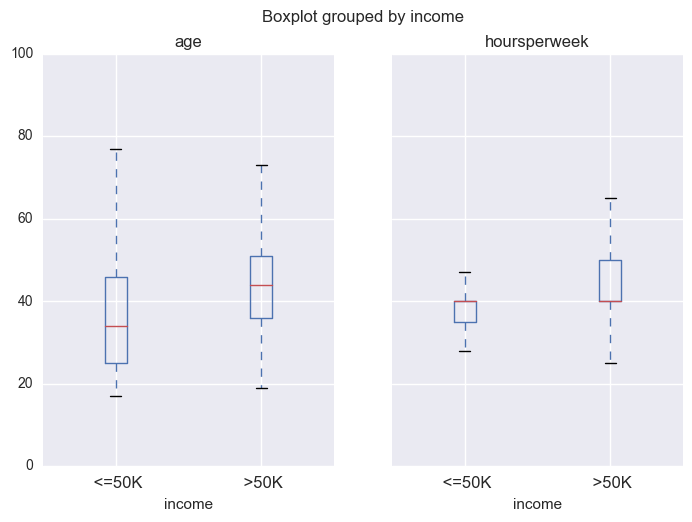

In [144]:
censusdata.boxplot(column=['age','hoursperweek'], by='income')
plt.show()

When we consider age, it seems that the m

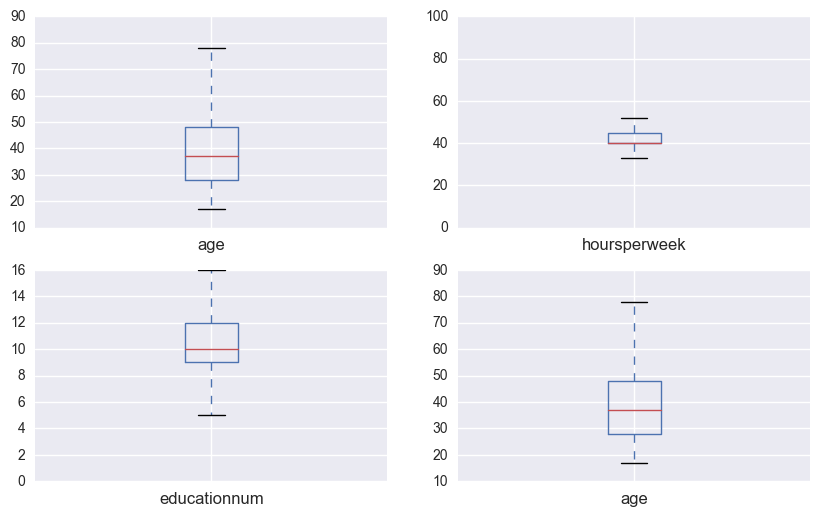

In [145]:
# ************************delete this part***********************************

# lets look at the boxplots separately
vars_to_plot_separate = [['age'],
                         ['hoursperweek'],
                         ['educationnum'],
                         ['age'] ]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2, 2, index+1)
    
    ax = censusdata.boxplot(column=plot_vars)
    
plt.show()

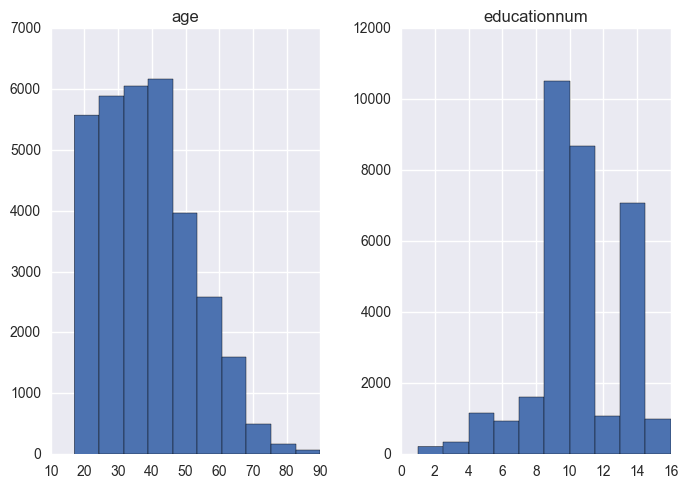

In [146]:
# histogram of age and educationnum
censusdata.hist(column=['age','educationnum'])

plt.show()

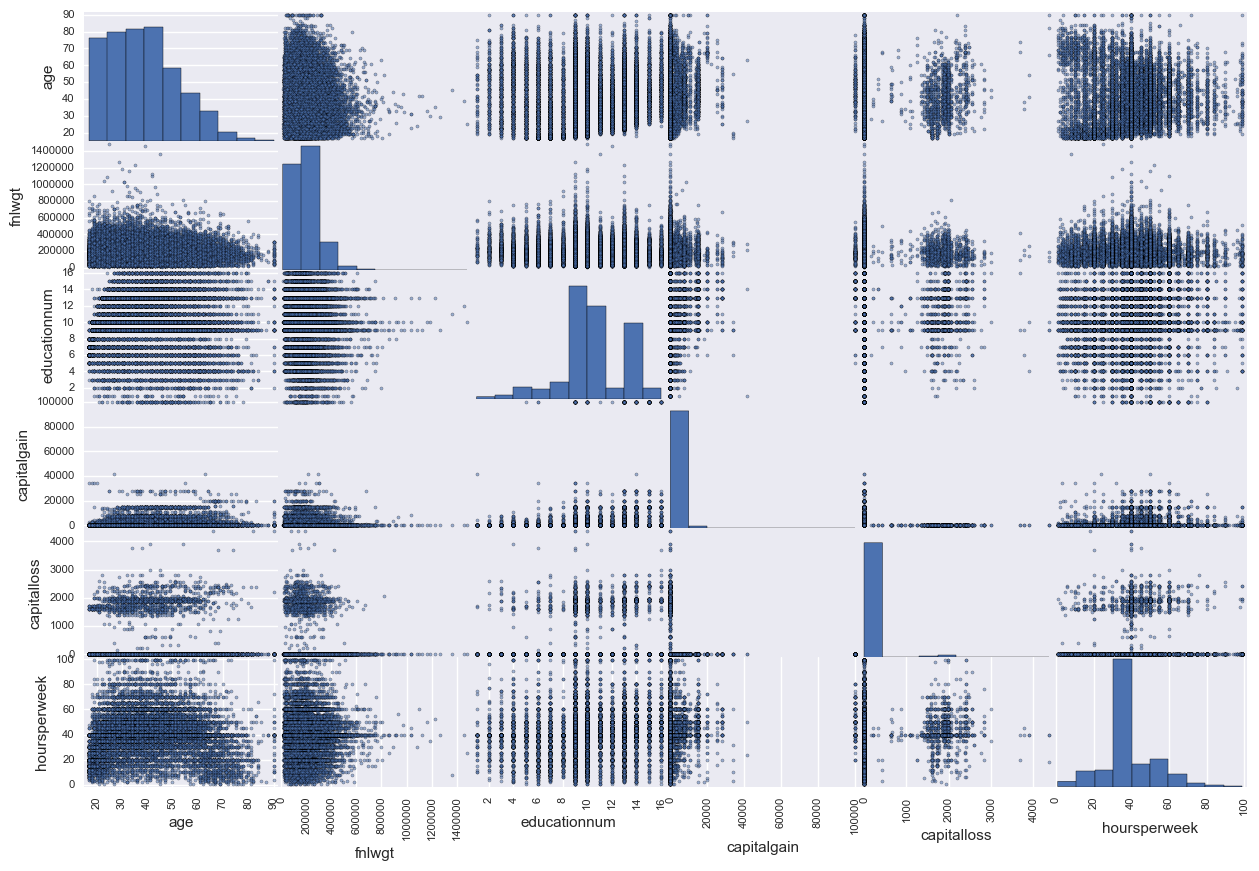

In [147]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(censusdata,figsize=(15, 10))

plt.show()

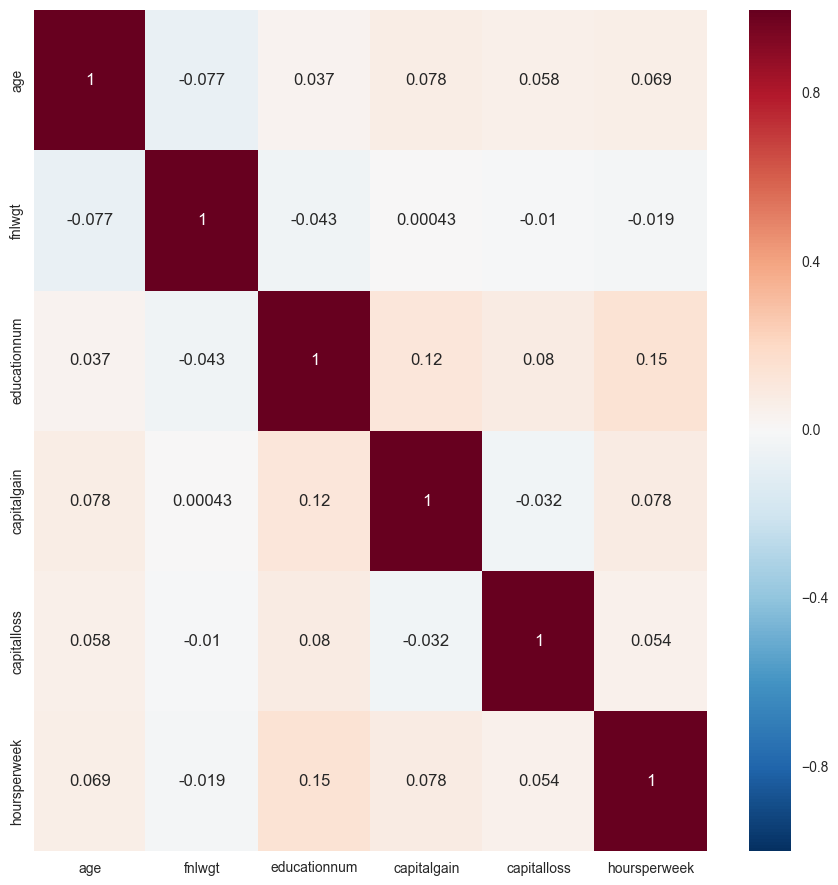

In [148]:
# plot the correlation matrix using seaborn
f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(censusdata.corr(), annot=True)

f.tight_layout()

plt.show()

#### D. Visualize the most interesting attributes – interpret the implications of each visualization

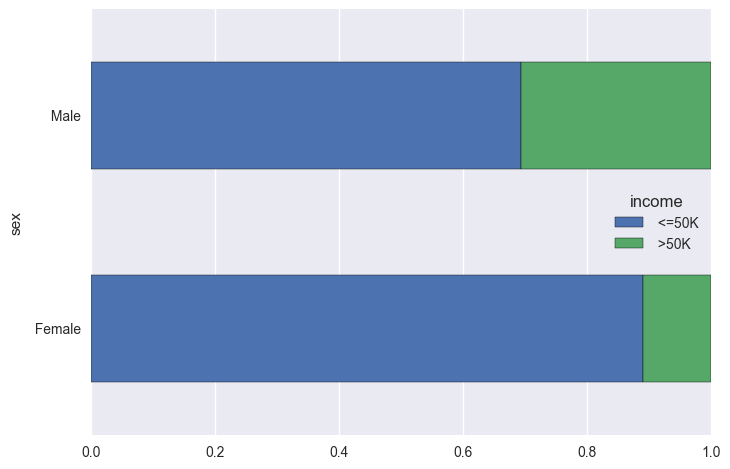

In [149]:
# i. >50 or not = "income" 

sexincome = pd.crosstab(censusdata['sex'],censusdata['income']).apply(lambda r: r/r.sum(), axis=1)
sexincome.plot(kind='barh', stacked=True)
plt.show()

In [150]:
# ii. Age - group ages with bar chart

In [151]:
# iii. Workclass

In [152]:
# iv. fnlwgt

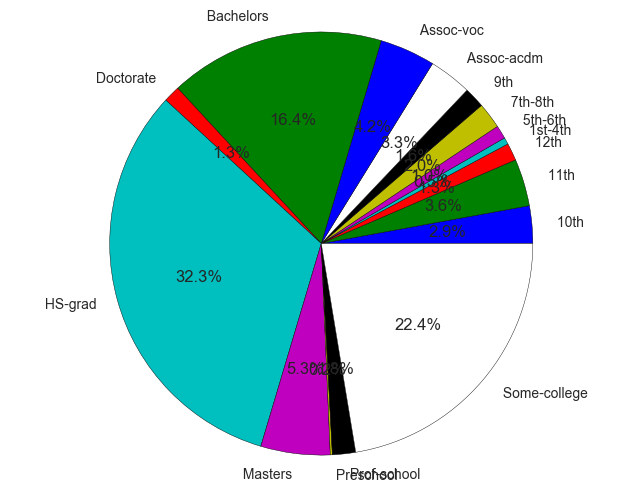

In [153]:
# v. education

# Create a series with education counts
educationcount = censusdata.groupby(['education']).education.count()

#Convert the series to dataframe
educationcountdataframe = pd.DataFrame({'education':educationcount.index, 'count':educationcount.values})


plt.pie(educationcountdataframe['count'], labels=educationcountdataframe['education'],
        autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [154]:
# vi. educationnum

In [155]:
# vii. maritalstatus

In [156]:
# viii. occupation

In [157]:
# ix. relationships

In [158]:
# x. race

In [159]:
# xi. sex

In [160]:
# xii. capitalgain

In [161]:
# xiii. capitalloss

In [162]:
# xiv. hoursperweek

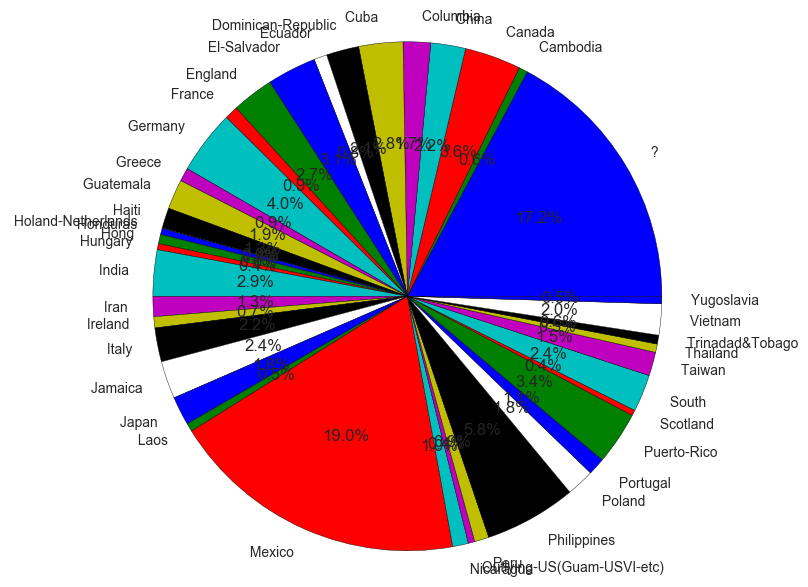

In [163]:
# xv. nativecountry

# Create a series with nativecountry counts
Nativecountrycount = censusdata.groupby(['nativecountry']).nativecountry.count()

# Convert the series to dataframe
Nativecountrycountdataframe = pd.DataFrame({'nativecountry':Nativecountrycount.index,
                                            'count':Nativecountrycount.values})

# since USA is 89%, we will draw the pie excluding USA

Nativecountrycountdataframe_no_USA = Nativecountrycountdataframe[Nativecountrycountdataframe.nativecountry.str.contains('United-States')==False]


plt.pie(Nativecountrycountdataframe_no_USA['count'], 
        labels=Nativecountrycountdataframe_no_USA['nativecountry'], autopct='%1.1f%%')

plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

#### E. Visualize relationship between attributes 

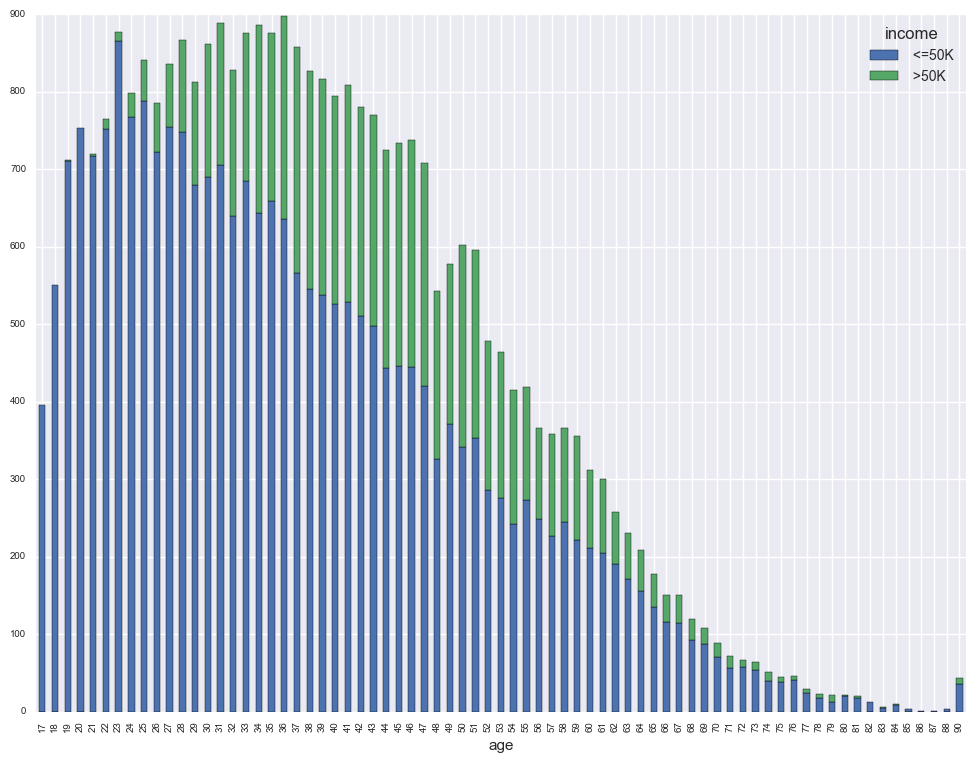

In [164]:
# i. age/income

ageincome = pd.crosstab(censusdata['age'],censusdata['income'])
ageincome.plot(kind='bar', stacked=True, figsize=(12,9), fontsize=7)
plt.show()

In [165]:
# ii. hoursperweek/income

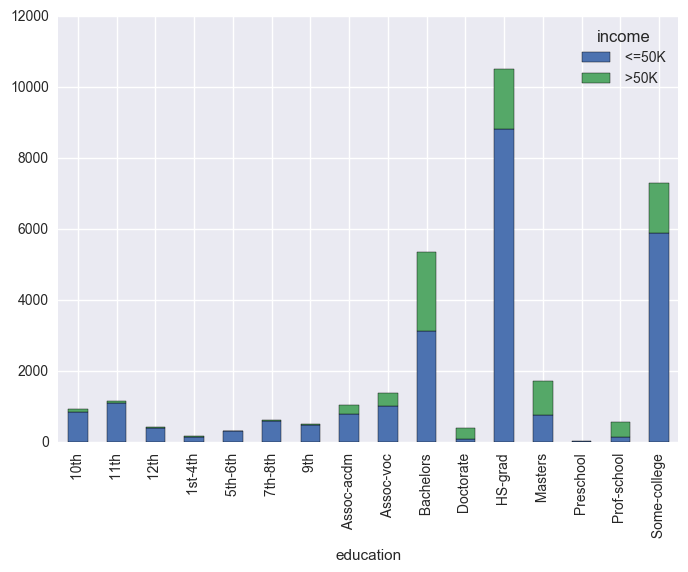

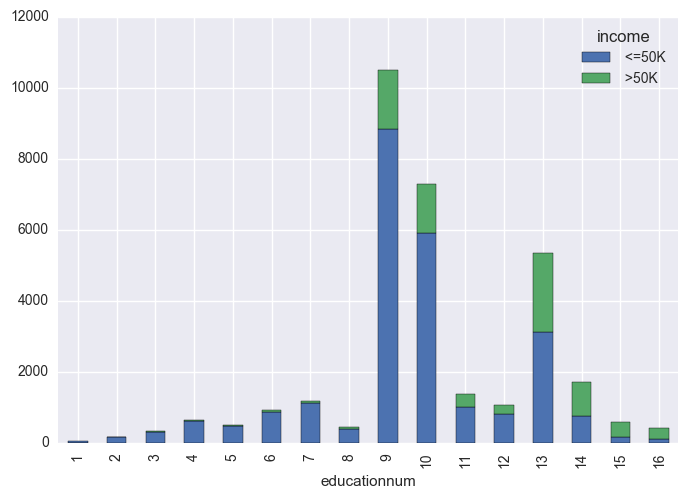

In [166]:
# iii. education/income and educationnum/income

educationincome = pd.crosstab(censusdata['education'],censusdata['income'])
educationincome.plot(kind='bar', stacked=True)
plt.show()

educationnumincome = pd.crosstab(censusdata['educationnum'],censusdata['income'])
educationnumincome.plot(kind='bar', stacked=True)
plt.show()

In [167]:
# iv. maritalstatus/education

In [168]:
# v. nativecountry/education/age

In [169]:
# vi. occupation/hoursperweek/income

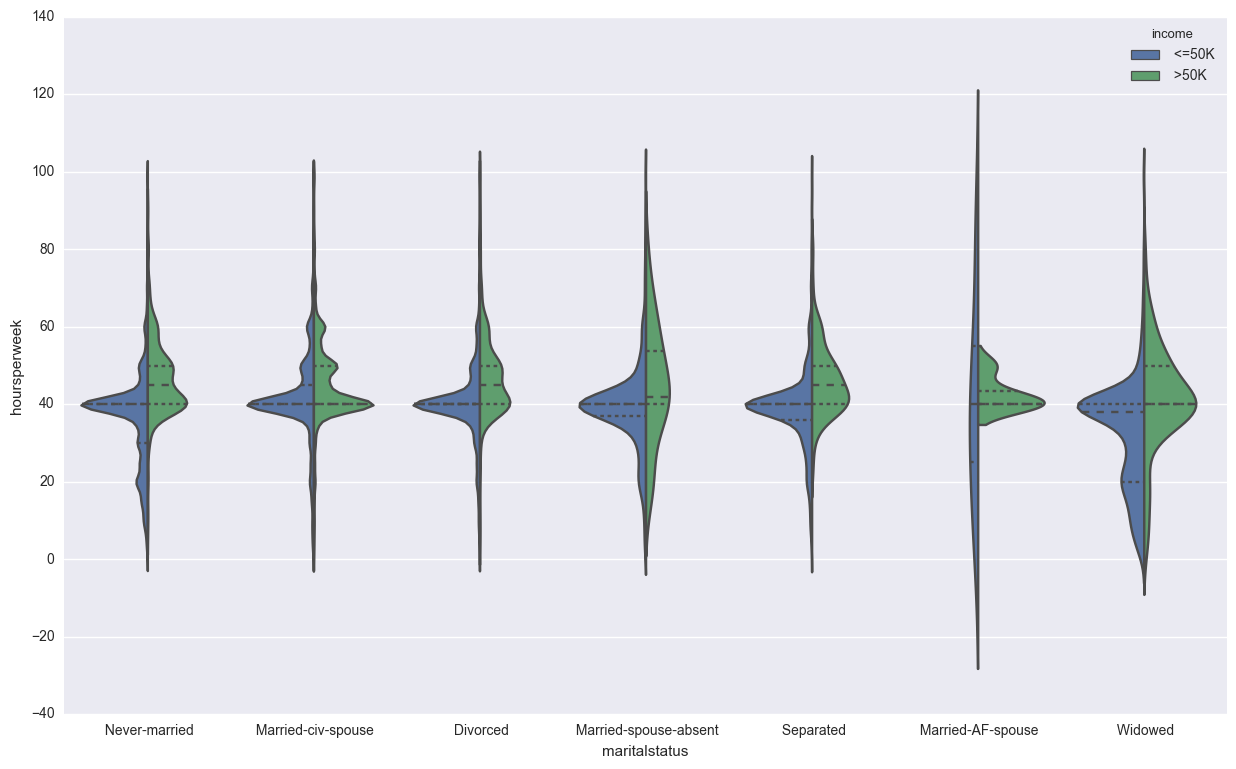

In [170]:
# **WAS NOT INCLUDED IN OUR INITIAL PLAN BUT I THOUGHT WOULD BE INTERESTING***
# maritalstatus/hoursperweek/income

f, ax = plt.subplots(figsize=(15, 9))

sns.violinplot(x="maritalstatus", y="hoursperweek", hue="income", data=censusdata, split=True, inner="quart")

plt.show()

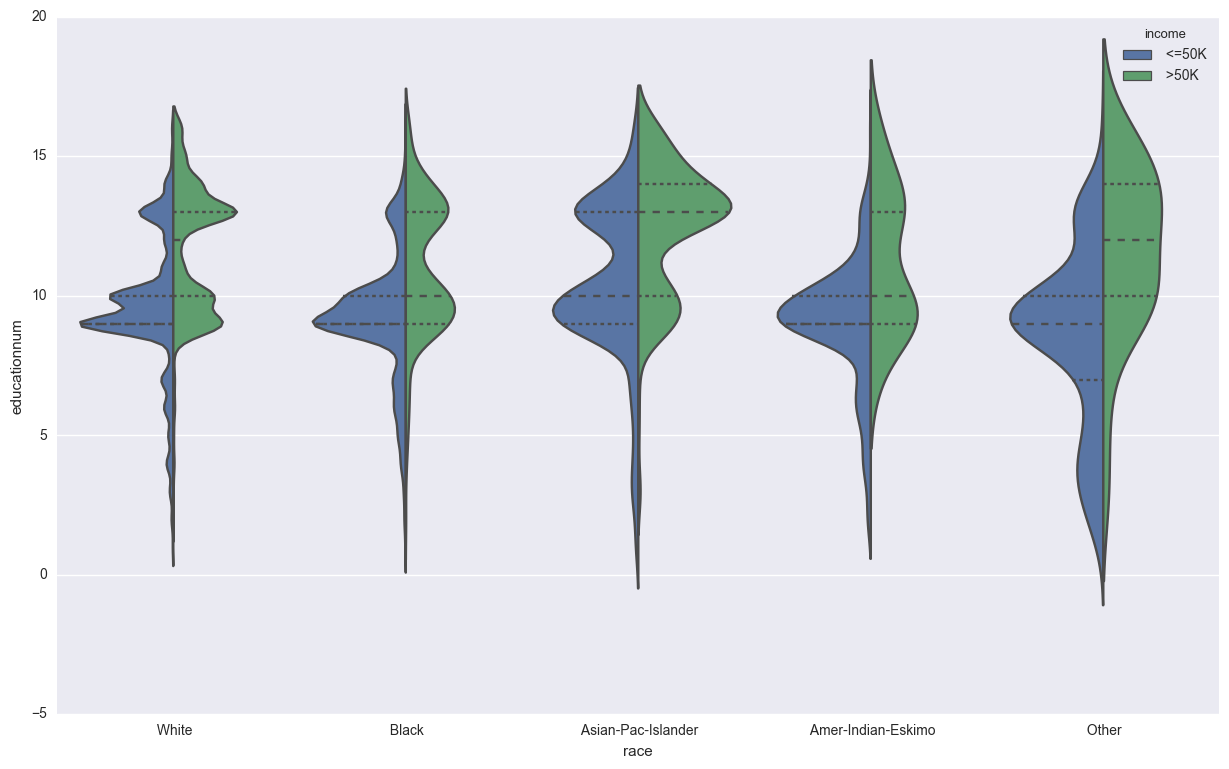

In [171]:
# **WAS NOT INCLUDED IN OUR INITIAL PLAN BUT I THOUGHT WOULD BE INTERESTING***
# race/educationnum/income

f, ax = plt.subplots(figsize=(15, 9))

sns.violinplot(x="race", y="educationnum", hue="income", data=censusdata, split=True, inner="quart")

plt.show()

#### F. Identify and explain interesting relationships between features and the class you are trying to predict

#### G. Are there other features that could be added to the data or created from existing features?  Which ones?

## References

http://scg.sdsu.edu/dataset-adult_r/

https://www.census.gov/content/dam/Census/newsroom/facts-for-features/2014/cb14-ff08.pdf

http://www.civilrights.org/census/accurate-count/inaccuracies.html

http://www2.nhc.org/media/files/HousingStabilityandChildren_Release_FINAL.pdf